# unsupervised machine learning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
dataset=pd.read_csv('Mall_customers.csv')

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x=dataset.iloc[:,3:]

In [5]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2,init='k-means++',random_state=0)
km.fit(x)

KMeans(n_clusters=2, random_state=0)

In [12]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [13]:
km.inertia_

181363.59595959607

In [38]:
output=pd.concat([dataset.reset_index(drop=True),pd.DataFrame(km.labels_,columns=['output'])],axis=1)

In [39]:
output

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),output
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


Text(0, 0.5, 'WCSS')

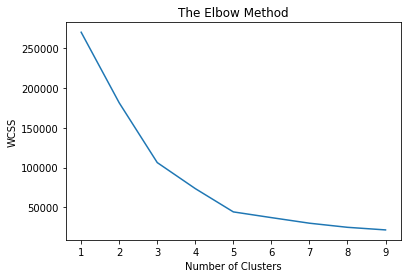

In [43]:
wcss=[]
for i in range(1,10):
    km=KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [45]:
km=KMeans(n_clusters=4,init='k-means++',random_state=0)
km.fit_predict(x)
e_clusters=km.labels_

In [46]:
e_clusters

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [64]:
from sklearn.metrics import silhouette_score, silhouette_samples

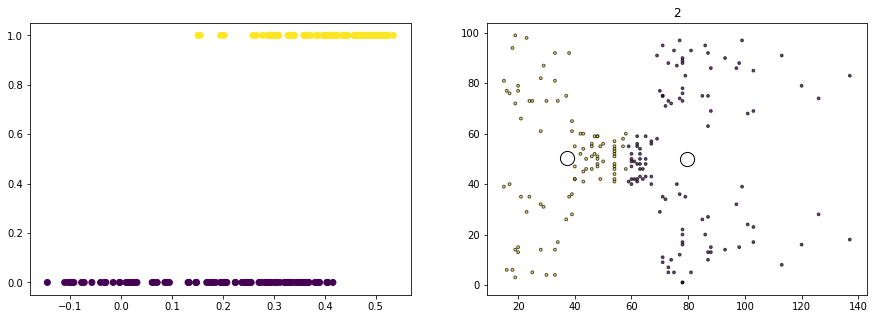

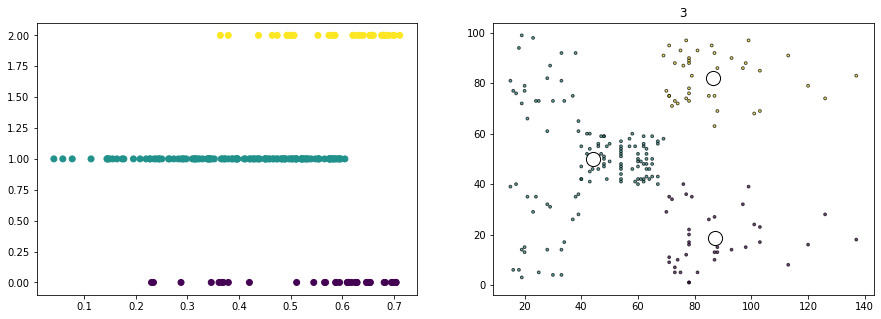

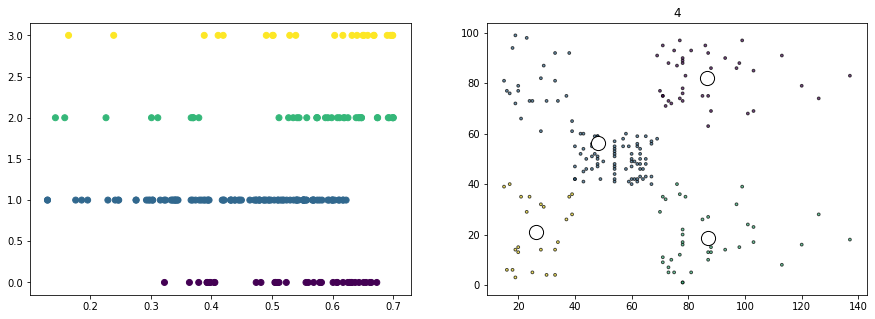

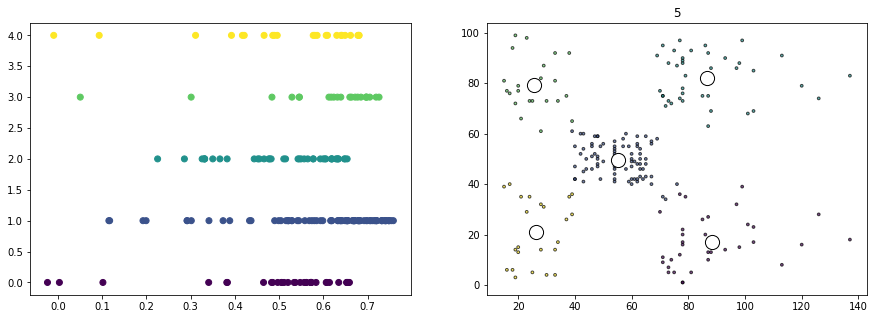

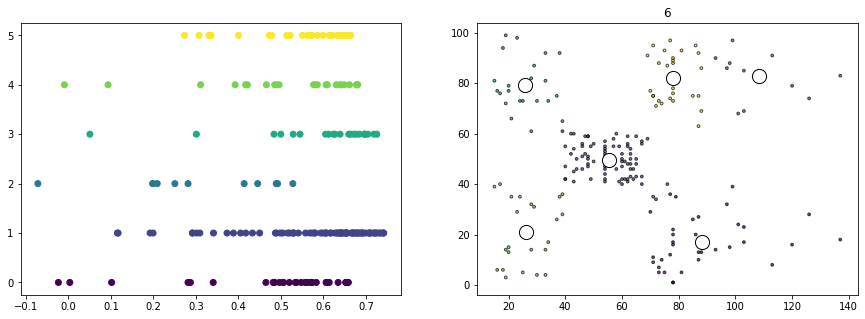

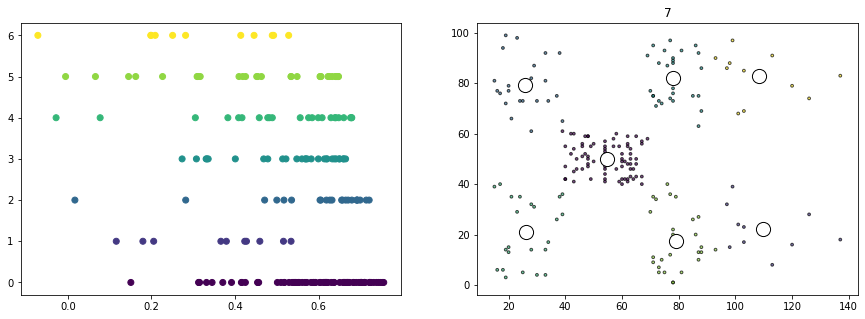

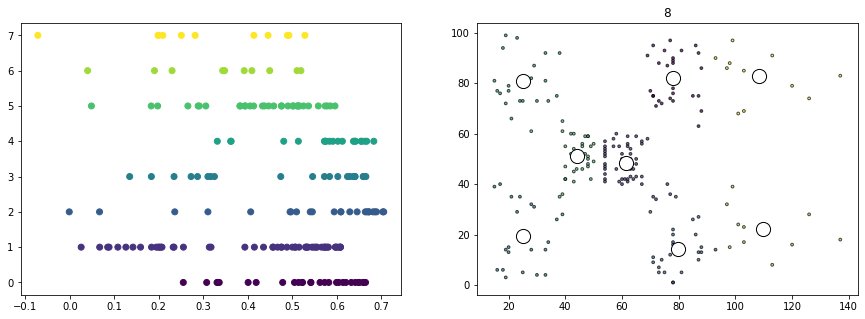

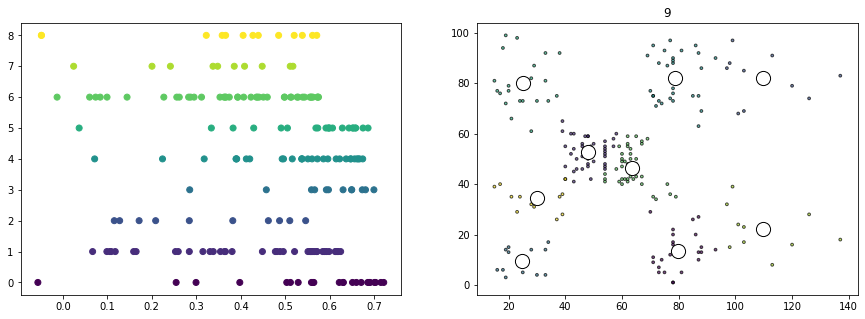

In [299]:
ss=[]
for i in range(2,10):
    km=KMeans(n_clusters=i,init='k-means++',random_state=0)
    pred=km.fit_predict(x)
    score=silhouette_score(x,pred)
    ss.append(score)
    
    sam_score=silhouette_samples(x,pred)
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.scatter(sam_score,pred,c=pred)
    plt.subplot(1,2,2)
    center=km.cluster_centers_
    plt.scatter(x=x.iloc[:, 0], y=x.iloc[:, 1], marker='.', s=30, alpha=0.7,c=pred, edgecolor='k')
    plt.scatter(x=center[:, 0], y=center[:, 1], marker='o', s=200, alpha=1,c="white", edgecolor='k')
    plt.title(i)
    plt.show()
    
    
    

## DBSCAN

In [268]:
from sklearn.cluster import DBSCAN

In [284]:
dbs=DBSCAN(eps=4, min_samples=6)

In [285]:
dbs.fit(x)

DBSCAN(eps=4, min_samples=6)

In [286]:
pred_dbs=dbs.labels_

In [287]:
sample_cores=np.zeros_like(pred_dbs,dtype='bool')

In [288]:
sample_cores[dbs.core_sample_indices_]=True

In [289]:
print('no of clusters are: ',len(set(pred_dbs))-(1 if -1 in pred else 0))

no of clusters are:  2


In [290]:
dbs_score=silhouette_score(x,pred_dbs)

In [291]:
dbs_score

-0.09522422310991059

In [292]:
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
parm={'eps':[0.5,1,2,3,4,5,6,7],'min_samples':[4,5,6,7,8,9,10]}

In [293]:
rs=RandomizedSearchCV(DBSCAN(),param_distributions=parm,cv=5,scoring='neg_mean_squared_error')

In [294]:
rs.fit(x)

c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: 

RandomizedSearchCV(cv=5, estimator=DBSCAN(),
                   param_distributions={'eps': [0.5, 1, 2, 3, 4, 5, 6, 7],
                                        'min_samples': [4, 5, 6, 7, 8, 9, 10]},
                   scoring='neg_mean_squared_error')

In [295]:
rs.best_params_,rs.best_estimator_,rs.best_score_

({'min_samples': 10, 'eps': 5}, DBSCAN(eps=5, min_samples=10), nan)

In [296]:
sample_cores

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False,  True,  True,  True,
       False,  True, False,  True,  True, False,  True, False, False,
       False, False, False,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

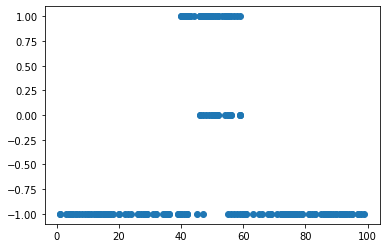

In [297]:
plt.scatter(x=x.iloc[:,1],y=dbs.labels_)

In [283]:
dbs.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [212]:
import sklearn

In [213]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

# Principal Component Analysis
Let's discuss PCA! Since this isn't exactly a full machine learning algorithm, but instead an unsupervised learning algorithm, we will just have a lecture on this topic, but no full machine learning project (although we will walk through the cancer set with PCA).


In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [301]:
from sklearn.datasets import load_breast_cancer

In [309]:
dataset=load_breast_cancer()

In [312]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [316]:
print(dataset['DESCR'])


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [319]:
df=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])

In [320]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# PCA Visualization
As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [321]:
from sklearn.preprocessing import StandardScaler

In [323]:
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)

In [326]:
from sklearn.decomposition import PCA

In [327]:
pca=PCA(n_components=3)

In [328]:
pca.fit(scaled_data)

PCA(n_components=3)

In [330]:
x_new=pca.transform(scaled_data)

In [336]:
scaled_data.shape,x_new.shape,dataset['target'].shape

((569, 30), (569, 3), (569,))

Text(0, 0.5, 'variable two')

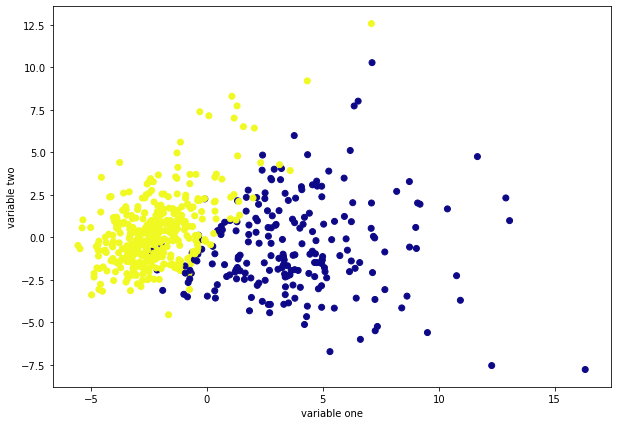

In [344]:
plt.figure(figsize=(10,7))
plt.scatter(x_new[:,0],x_new[:,1],c=dataset['target'],cmap='plasma')
plt.xlabel('variable one')
plt.ylabel('variable two')


In [362]:
x=pd.DataFrame(data=x_new,columns=['x1','x2','x3'])

In [370]:
x

,x1,x2,x3
0,9.192837,1.948583,-1.123166
1,2.387802,-3.768172,-0.529292
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232790
4,3.935302,-1.948072,1.389767
...,...,...,...
564,6.439315,-3.576817,2.459487
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902297,0.562730
567,10.374794,1.672010,-1.877029


In [397]:
y=pd.DataFrame(dataset['target'],columns=['output'])

In [414]:
y

,output
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


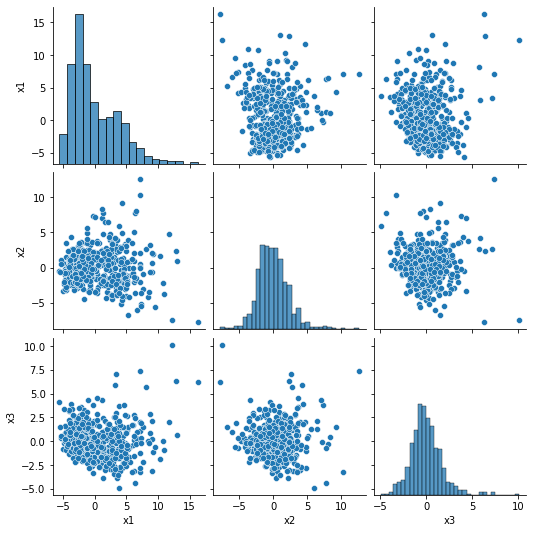

In [431]:
sns.pairplot(x)

In [357]:
x_new

array([[ 9.19283683,  1.94858309, -1.12316603],
       [ 2.3878018 , -3.76817172, -0.52929242],
       [ 5.73389628, -1.0751738 , -0.5517476 ],
       ...,
       [ 1.25617928, -1.90229672,  0.56273041],
       [10.37479406,  1.6720101 , -1.87702937],
       [-5.4752433 , -0.67063675,  1.49044355]])

In [432]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611301,
         0.15189161,  0.06016537, -0.03476749,  0.19034877,  0.36657549,
        -0.10555215,  0.08997968, -0.08945724, -0.15229263,  0.20443046,
         0.23271588,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359316,  0.09796412, -0.00825723,  0.14188335,  0.27533947],
       [-0.00853125,  0.06454994, -0.00931423,  0.02869954, -0.10429205,
        -0.07409161,  0.00273395, -0.02556343, -0

<AxesSubplot:>

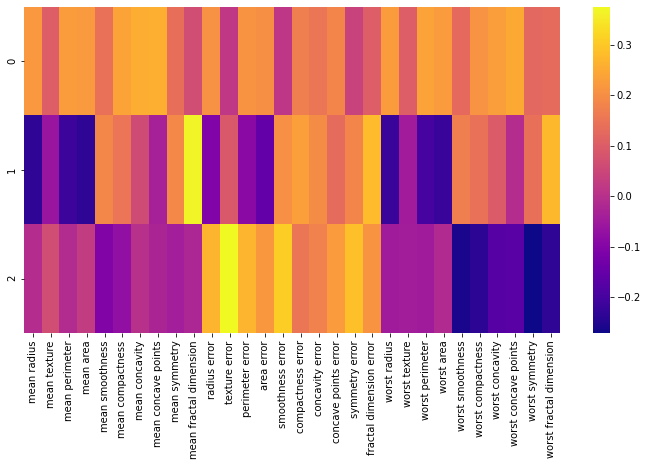

In [439]:
df_comp = pd.DataFrame(pca.components_,columns=dataset['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

In [440]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034767,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025563,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791


# hierarchical clustering

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
hc=AgglomerativeClustering(n_clusters=2)

In [10]:
hc.fit(x)

AgglomerativeClustering()

In [11]:
hc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score,silhouette_score,silhouette_samples

In [14]:
silhouette_score(x,hc.labels_)

0.36706444723912895

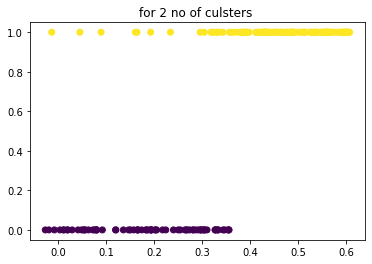

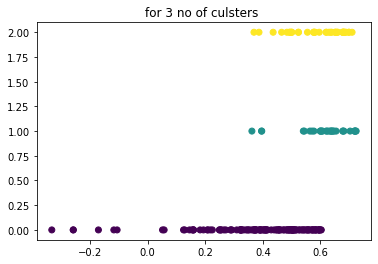

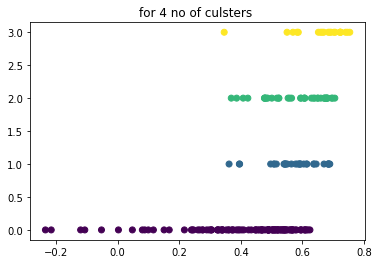

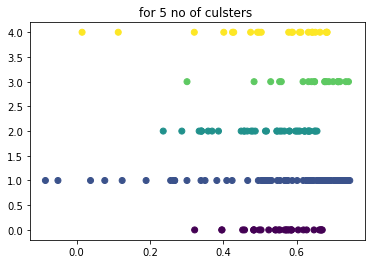

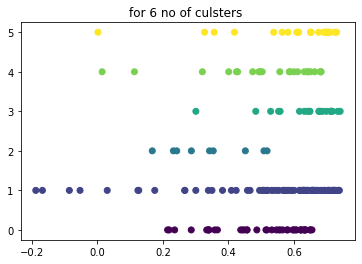

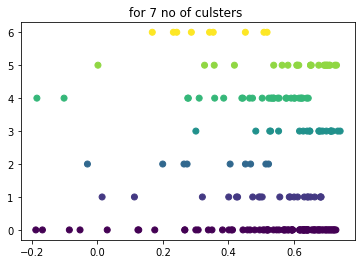

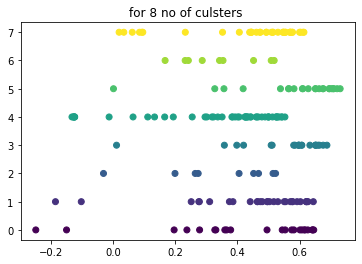

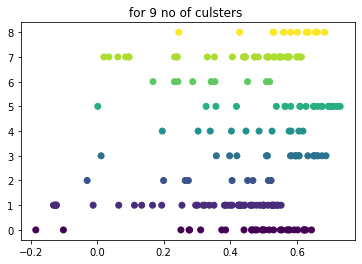

In [16]:
for i in range(2,10):
    hc=AgglomerativeClustering(n_clusters=i)
    hc.fit(x)
    hc_score=silhouette_samples(x,hc.labels_)
    
    plt.scatter(hc_score,hc.labels_,c=hc.labels_)
    plt.title('for {} no of culsters '.format(i))
    plt.show()

In [23]:
scr=[]
for i in range(2,10):
    hc=AgglomerativeClustering(n_clusters=i)
    hc.fit(x)
    scr.append(silhouette_score(x,hc.labels_))
   

In [24]:
scr

[0.36706444723912895,
 0.4618340266628975,
 0.4916598193892782,
 0.5529945955148897,
 0.5380208285578872,
 0.519904611908887,
 0.4326286245782246,
 0.43892545672004507]